## Luis Eduardo Jiménez del Muro - 19/10/2023

# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_3$"
- El mensaje que llegó fue: "12, 19, 15, 24"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [18]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [20]:
def f1(x):
    return (1 + x**4 )**(1/2)

def f2(x):
    return np.log(np.log(x))

def f3(x):
    return 1 / (np.log(x))

def f4(x):
    return np.exp(-((x**2)/(2)))

a = 4
b = 5
N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=[], index=N)


def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)


for i in N:
    aproximacion1 = montecarlo(f1, int(i), a, b)
    aproximacion2 = montecarlo(f2, int(i), a, b)
    aproximacion3 = montecarlo(f3, int(i), a, b)
    aproximacion4 = montecarlo(f4, int(i), a, b)
    table.loc[i, "Aproximación f1(x)"] =  aproximacion1
    table.loc[i, "Error f1(x)"] = abs(20.3583 - aproximacion1)
    table.loc[i, "Aproximación f2(x)"] =  aproximacion2
    table.loc[i, "Error f2(x)"] = abs(0.405885 - aproximacion2)
    table.loc[i, "Aproximación f3(x)"] =  aproximacion3
    table.loc[i, "Error f3(x)"] = abs(0.667003 - aproximacion3)
    table.loc[i, "Aproximación f4(x)"] =  aproximacion4
    table.loc[i, "Error f4(x)"] = abs(0.0000786695 - aproximacion4)

table

,Aproximación f1(x),Error f1(x),Aproximación f2(x),Error f2(x),Aproximación f3(x),Error f3(x),Aproximación f4(x),Error f4(x)
10.0,19.349064,1.009236,0.417220,0.011335,0.666661,0.000342,0.000113,3.464286e-05
100.0,20.799485,0.441185,0.393613,0.012272,0.663994,0.003009,0.000088,9.277701e-06
1000.0,20.363535,0.005235,0.408138,0.002253,0.667478,0.000475,0.000082,3.267821e-06
10000.0,20.390941,0.032641,0.405520,0.000365,0.666959,0.000044,0.000080,1.203759e-06
100000.0,20.359217,0.000917,0.406016,0.000131,0.666966,0.000037,0.000078,4.817574e-07


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

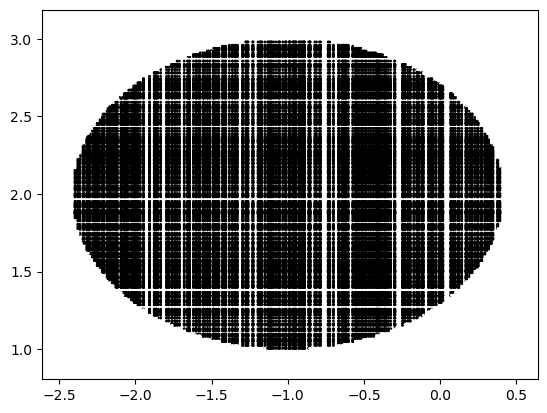

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def bernoulli (x, y):
    return x**2 + 2*y**2 <= - 2*x + 8*y - 7

a=-2.5
b=0.5
c=0.9
d=3.1

x = np.random.uniform(a, b, 300)
y = np.random.uniform(c, d, 300)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, s=1, c=bernoulli(X,Y), cmap="Greys") #cmap: cambia de color el area deseada


In [33]:
def montecarlo(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B) * AR


N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación", "Error Relativo"], index=N)

for i in N:
    AR = (b - a) * (d - c)
    AD = montecarlo(bernoulli, a, b, c, d, int(i))
    C_rel = ((1 - (AD / AR))/(AD / AR))**(1/2)
    error = np.log10(C_rel) - ((1/2)*np.log10(i))
    
    table.loc[i, "Aproximación"] =  AD
    table.loc[i, "Error Relativo"] = error

table

,Aproximación,Error Relativo
10.0,5.94,-0.977121
100.0,4.752,-1.205087
1000.0,4.4286,-1.654763
10000.0,4.49328,-2.164478
100000.0,4.433616,-2.655511


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [1]:
import pandas as pd
import numpy as np

In [4]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [40]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

T0 = np.array([
    [0.50, 0.00],
    [0.00, 0.50],
])

D0 = np.array([1.00, 1.00])

T1 = np.array([
    [0.50, 0.00],
    [0.00, 0.50],
])

D1 = np.array([50.00, 1.00])

T2 = np.array([
    [0.50, 0.00],
    [0.00, 0.50],
])

D2 = np.array([1.00, 50.00])

T3 = np.array([
    [0.50, 0.00],
    [0.00, 0.50],
])

D3 = np.array([50.00, 50.00])

x = [np.array([0, 0])]

T = [T0, T1, T2, T3]
D = [D0, D1, D2, D3]

for k in range(10**5):
    i = random.choices([0, 1, 2, 3], weights=df["$p_i$"])[0]
    xkm1 = T[i] @ x[-1] + D[i]
    x.append(xkm1)

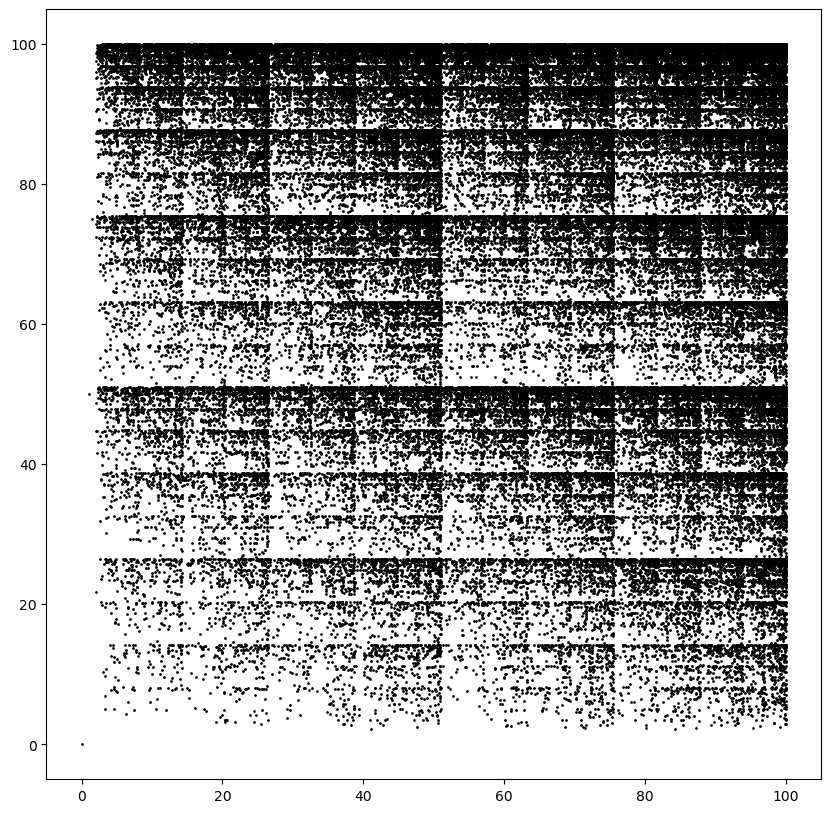

In [41]:
resultado = np.array(x)
plt.figure(figsize=(10, 10))
plt.scatter(resultado[:, 0], resultado[:, 1], s=1, c="k")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

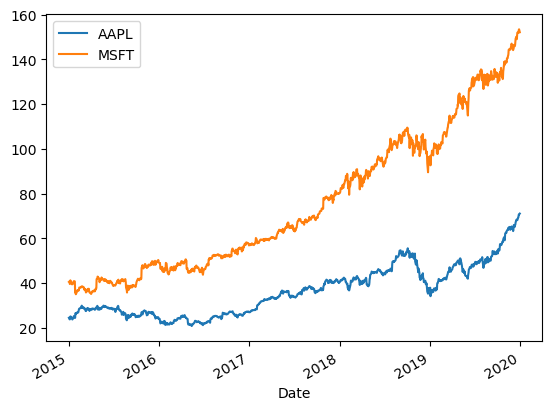

In [55]:
import yfinance as yf
import pandas as pd

a = "AAPL"
b = "MSFT"

def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]

data = getClose([a, b], "2015-01-01", "2019-12-31")

data.plot()

Calcule los rendimientos diarios junto con sus características estadísticas

<Axes: ylabel='Frequency'>

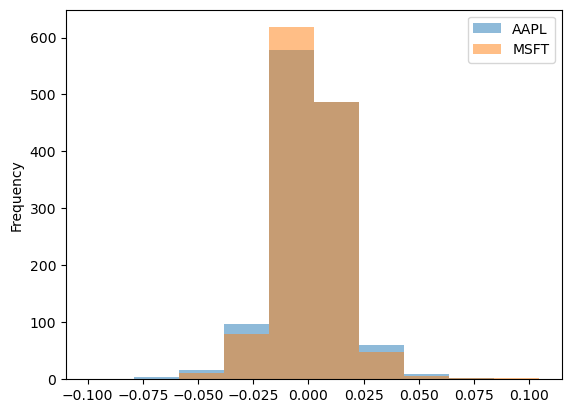

In [56]:
R = (data - data.shift())/data.shift()
R.plot.hist(alpha=0.5)

In [57]:
R.describe()

,AAPL,MSFT
count,1256.000000,1256.000000
mean,0.000971,0.001161
std,0.015651,0.014692
min,-0.099607,-0.092534
25%,-0.005857,-0.005404
50%,0.000892,0.000890
75%,0.008924,0.008059
max,0.070422,0.104523


Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [69]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(start=fecha_inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=R_sim)

sim_a = sim_R(R[a].mean(), R[a].std(), "2020-01-01", 365, 1000)
sim_b = sim_R(R[b].mean(), R[b].std(), "2020-01-01", 365, 1000)


Calcule los precios con base en los rendimientos simulados

In [70]:
precios_simulados_a = (1 + sim_a).cumprod()*data[a][-1]
precios_simulados_b = (1 + sim_b).cumprod()*data[b][-1]

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

<Axes: >

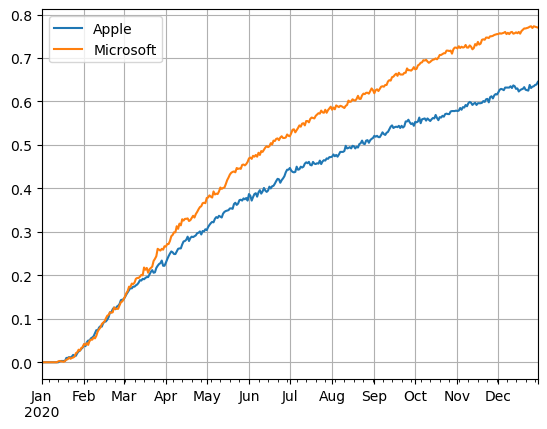

In [71]:
porcentaje = 1.20

valor_deseado_a = data[a][-1]*porcentaje
valor_deseado_b = data[b][-1]*porcentaje

sobrepasa_a = valor_deseado_a <= precios_simulados_a
sobrepasa_b = valor_deseado_b <= precios_simulados_b

probabilidad_a = sobrepasa_a.mean(axis=1)
probabilidad_b = sobrepasa_b.mean(axis=1)

tabla = pd.DataFrame(index=probabilidad_a.index)
tabla["Apple"] = probabilidad_a
tabla["Microsoft"] = probabilidad_b
tabla.plot(grid=True)

In [91]:
print("La probablidad de ganar un 20% en Apple es: ", probabilidad_a[-1])
print("La probablidad de ganar un 20% en Microsoft es: ", probabilidad_b[-1])

La probablidad de ganar un 20% en Apple es:  0.645
La probablidad de ganar un 20% en Microsoft es:  0.77


Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

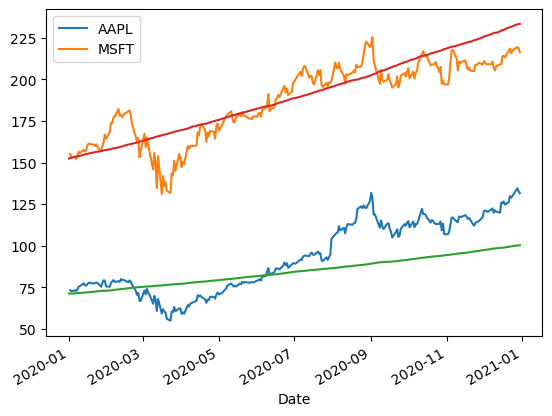

In [86]:
data2 = getClose([a, b], "2020-01-01", "2020-12-31")
data2.plot()
precios_simulados_a.mean(axis=1).plot()
precios_simulados_b.mean(axis=1).plot()

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?

In [128]:
media = 1.64
std = 0.04

R_sim = np.random.normal(media, std, size=(20, 10000))
data = pd.DataFrame(data=R_sim)
(data.sum() > 30).mean()


1.0